### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
ruta='/content/drive/MyDrive/Ingenierias Caracteristicas/Módulo 4 - Codificación de variables categóricas/' 
df=pd.read_csv(ruta+'data.csv',sep=',')
df.info

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<bound method DataFrame.info of           Escolaridad  No. de hijos
0     Primaria trunca             9
1          Secundaria             3
2        Preparatoria             2
3     Sin escolaridad             3
4            Primaria             2
...               ...           ...
5055       Secundaria             1
5056     Preparatoria             3
5057         Primaria             1
5058       Secundaria             3
5059       Secundaria             3

[5060 rows x 2 columns]>

2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [ ]:
#Buscanso ahora la variable categórica.
df.dtypes

Escolaridad     object
No. de hijos     int64
dtype: object

In [ ]:
D=df['Escolaridad'].unique()
D

array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [ ]:
n=len(df['Escolaridad'].unique())
print('n:',n)
new_order = ['Preparatoria', 'Secundaria', 'Primaria', 'Primaria trunca', 'Sin escolaridad']
new_order

n: 5


['Preparatoria',
 'Secundaria',
 'Primaria',
 'Primaria trunca',
 'Sin escolaridad']

In [ ]:
#Medición de la cardinalidad: Impar o Par? 
n=len(df['Escolaridad'].unique())
n

5

In [ ]:
def cuad(var_ord,a2=1):
  n=len(var_ord)
  L=n-1 if n%2==0 else (n-1)//2 #Límites de la x.
  S=2 if n%2==0 else 1 #Brincos de uno a uno porque la cardinalidad resultó impar.
  x=range(-L,L+1,S)
  a1=0
  a0=-a2/n*np.sum([i**2 for i in x])
  return {new_order:a0+a1*i+a2*i**2 for new_order,i in zip(var_ord,x)}

In [ ]:
df['Escolaridad_cuad']=df['Escolaridad'].map(cuad(new_order))
df.head(10)

#En la sustitución con el polinomio cuadrático observamos colisión, pues se observan repeticiones en la codificación para las diferentes categorías. 

,Escolaridad,No. de hijos,Escolaridad_lin,Escolaridad_cuad
0,Primaria trunca,9,1,-1.0
1,Secundaria,3,-1,-1.0
2,Preparatoria,2,-2,2.0
3,Sin escolaridad,3,2,2.0
4,Primaria,2,0,-2.0
5,Preparatoria,3,-2,2.0
6,Secundaria,0,-1,-1.0
7,Primaria,2,0,-2.0
8,Sin escolaridad,8,2,2.0
9,Preparatoria,3,-2,2.0


In [ ]:
#Agregamos codificación líneal para la diferenciación de la codificación cuadrática resultante con duplicidad. 
df['Escolaridad_cuad']=df['Escolaridad'].map(cuad(df['No. de hijos']))
df.head()

,Escolaridad,No. de hijos,Escolaridad_lin,Escolaridad_cuad
0,Primaria trunca,9,1,NaN
1,Secundaria,3,-1,NaN
2,Preparatoria,2,-2,NaN
3,Sin escolaridad,3,2,NaN
4,Primaria,2,0,NaN


In [ ]:
#Normalización previo al cálculo de la regresión líneal.
Esc_cuad=cuad(new_order)
Esc_cuad

{'Preparatoria': 2.0,
 'Secundaria': -1.0,
 'Primaria': -2.0,
 'Primaria trunca': -1.0,
 'Sin escolaridad': 2.0}

In [ ]:
n_Esc=np.sqrt(np.sum([i**2 for i in Esc_cuad.values()]))
n_Esc # Norma euclideana de 'Escolaridad'

3.7416573867739413

In [ ]:
d_cuad=Esc_cuad.copy()

for k in Esc_cuad:
  d_cuad[k]=Esc_cuad[k]/n_Esc
np.sum([i**2 for i in d_cuad.values()])

#Se observa que la norma sea resultante sea = 1

1.0000000000000002

In [ ]:
df['Esc_cuad']=df['Escolaridad'].map(d_cuad)
df.head()

,Escolaridad,No. de hijos,Escolaridad_lin,Escolaridad_cuad,Esc_cuad
0,Primaria trunca,9,1,NaN,-0.267261
1,Secundaria,3,-1,NaN,-0.267261
2,Preparatoria,2,-2,NaN,0.534522
3,Sin escolaridad,3,2,NaN,0.534522
4,Primaria,2,0,NaN,-0.534522


3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


lin=LinearRegression()
lin.fit(df[['Esc_cuad']],df['No. de hijos'])


LinearRegression()

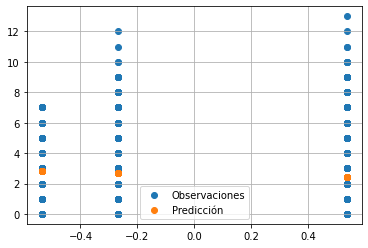

In [ ]:
f=lin.predict(df[['Esc_cuad']])

plt.scatter(df['Esc_cuad'],df['No. de hijos'],label='Observaciones')
plt.scatter(df['Esc_cuad'],f,label='Predicción')
plt.legend()
plt.grid()

In [ ]:
d_cuad

{'Preparatoria': 0.5345224838248488,
 'Secundaria': -0.2672612419124244,
 'Primaria': -0.5345224838248488,
 'Primaria trunca': -0.2672612419124244,
 'Sin escolaridad': 0.5345224838248488}